In [2]:
%load_ext autoreload
%autoreload 2
import hippo
import mrich
from rich import print
import molparse as mp
import plotly.express as px
import pandas as pd
from pathlib import Path
import json

In [5]:
animal = hippo.HIPPO("RdRp_FFF", "../../BulkDock/TARGETS/Flavi_NS5_RdRp/Flavi_NS5_RdRp.sqlite")

 Creating HIPPO animal

name = RdRp_FFF

db_path = ../../BulkDock/TARGETS/Flavi_NS5_RdRp/Flavi_NS5_RdRp.sqlite

DEBUG: hippo.Database.__init__()

DEBUG: Database.path = ../../BulkDock/TARGETS/Flavi_NS5_RdRp/Flavi_NS5_RdRp.sqlite

DEBUG: hippo.Database.connect()

DEBUG: sqlite3.version='2.6.0'

 Success  Database connected @ ../../BulkDock/TARGETS/Flavi_NS5_RdRp/Flavi_NS5_RdRp.sqlite!

 Success  Initialised animal HIPPO("RdRp_FFF")!

In [3]:
animal.db.backup()

 DISK  Writing /opt/xchem-fragalysis-2/maxwin/BulkDock/TARGETS/Flavi_NS5_RdRp/Flavi_NS5_RdRp_0L1DXM2.sqlite...

Output()

DEBUG: Copied 10000 of 519130 pages...

DEBUG: Copied 20000 of 519130 pages...

DEBUG: Copied 30000 of 519130 pages...

DEBUG: Copied 40000 of 519130 pages...

DEBUG: Copied 50000 of 519130 pages...

DEBUG: Copied 60000 of 519130 pages...

DEBUG: Copied 70000 of 519130 pages...

DEBUG: Copied 80000 of 519130 pages...

DEBUG: Copied 90000 of 519130 pages...

DEBUG: Copied 100000 of 519130 pages...

DEBUG: Copied 110000 of 519130 pages...

DEBUG: Copied 120000 of 519130 pages...

DEBUG: Copied 130000 of 519130 pages...

DEBUG: Copied 140000 of 519130 pages...

DEBUG: Copied 150000 of 519130 pages...

DEBUG: Copied 160000 of 519130 pages...

DEBUG: Copied 170000 of 519130 pages...

DEBUG: Copied 180000 of 519130 pages...

DEBUG: Copied 190000 of 519130 pages...

DEBUG: Copied 200000 of 519130 pages...

DEBUG: Copied 210000 of 519130 pages...

DEBUG: Copied 220000 of 519130 pages...

DEBUG: Copied 230000 of 519130 pages...

DEBUG: Copied 240000 of 519130 pages...

DEBUG: Copied 250000 of 519130 pages...

DEBUG: Copied 260000 of 519130 pages...

DEBUG: Copied 270000 of 519130 pages...

DEBUG: Copied 280000 of 519130 pages...

DEBUG: Copied 290000 of 519130 pages...

DEBUG: Copied 300000 of 519130 pages...

DEBUG: Copied 310000 of 519130 pages...

DEBUG: Copied 320000 of 519130 pages...

DEBUG: Copied 330000 of 519130 pages...

DEBUG: Copied 340000 of 519130 pages...

DEBUG: Copied 350000 of 519130 pages...

DEBUG: Copied 360000 of 519130 pages...

DEBUG: Copied 370000 of 519130 pages...

DEBUG: Copied 380000 of 519130 pages...

DEBUG: Copied 390000 of 519130 pages...

DEBUG: Copied 400000 of 519130 pages...

DEBUG: Copied 410000 of 519130 pages...

DEBUG: Copied 420000 of 519130 pages...

DEBUG: Copied 430000 of 519130 pages...

DEBUG: Copied 440000 of 519130 pages...

DEBUG: Copied 450000 of 519130 pages...

DEBUG: Copied 460000 of 519130 pages...

DEBUG: Copied 470000 of 519130 pages...

DEBUG: Copied 480000 of 519130 pages...

DEBUG: Copied 490000 of 519130 pages...

DEBUG: Copied 500000 of 519130 pages...

DEBUG: Copied 510000 of 519130 pages...

DEBUG: Copied 519130 of 519130 pages...

 C56537 "ASAP-0038694"

inchikey = ZFGFQBONQPPJMM-UHFFFAOYSA-N

alias = ASAP-0038694

smiles = Brc1ccnc2c(NCc3ccncc3)cccc12

bases = None

elabs = elaborations of C56537: {C × 1368}

is_base = True

is_elab = False

num_heavy_atoms = 19

num_rings = 3

formula = C15H12BrN3

#reactions (product) = 1

#reactions (reactant) = 0

tags = ['iter1 scaffolds', 'all enamine ordered', 'elaborated iter1 scaffold']

#poses = 3

targets =
[T1 "Flavi_NS5_RdRp"]

metadata = {}

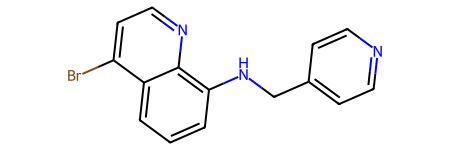

In [8]:
animal.compounds[
# "ASAP-0038752"
# "ASAP-0038667"
"ASAP-0038694"
].summary()

In [10]:
# scaffold = animal.compounds["ASAP-0037733"]
scaffold = animal.compounds["ASAP-0038694"]
scaffold.reactions.ids

[487]

In [20]:
scaffold

C56537 "ASAP-0038694"

In [11]:
# scaffold_reaction = animal.reactions[429]
scaffold_reaction = animal.reactions[487]

In [12]:
scaffold_reactants = scaffold_reaction.reactants
scaffold_reactants_ids = set(scaffold_reactants.ids)

In [13]:
elabs = scaffold.elabs

In [14]:
reaction_map = animal.db.get_reaction_map_from_products(elabs.ids)
reaction_map = { k[1]:list(v.values())[0] for k,v in reaction_map.items() }

In [16]:
picks = set()

for elab_id in mrich.track(elabs.ids):

    # r = elab.reactions[0]

    reactants = reaction_map[elab_id]

    n_shared = len(reactants.intersection(scaffold_reactants_ids))

    match n_shared:
        case 0:
            # print(elab, r, "NO")
            continue
        case 1:
            # print(elab, r, "YES")
            picks.add(elab_id)
        case 2:
            # print(elab, r, "SCAFFOLD")
            continue

picks = animal.compounds[picks]

Output()

/opt/xchem-fragalysis-2/maxwin/conda/lib/python3.12/site-packages/rdkit/Chem/Draw/IPythonConsole.py:344: UserWarning:

Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.



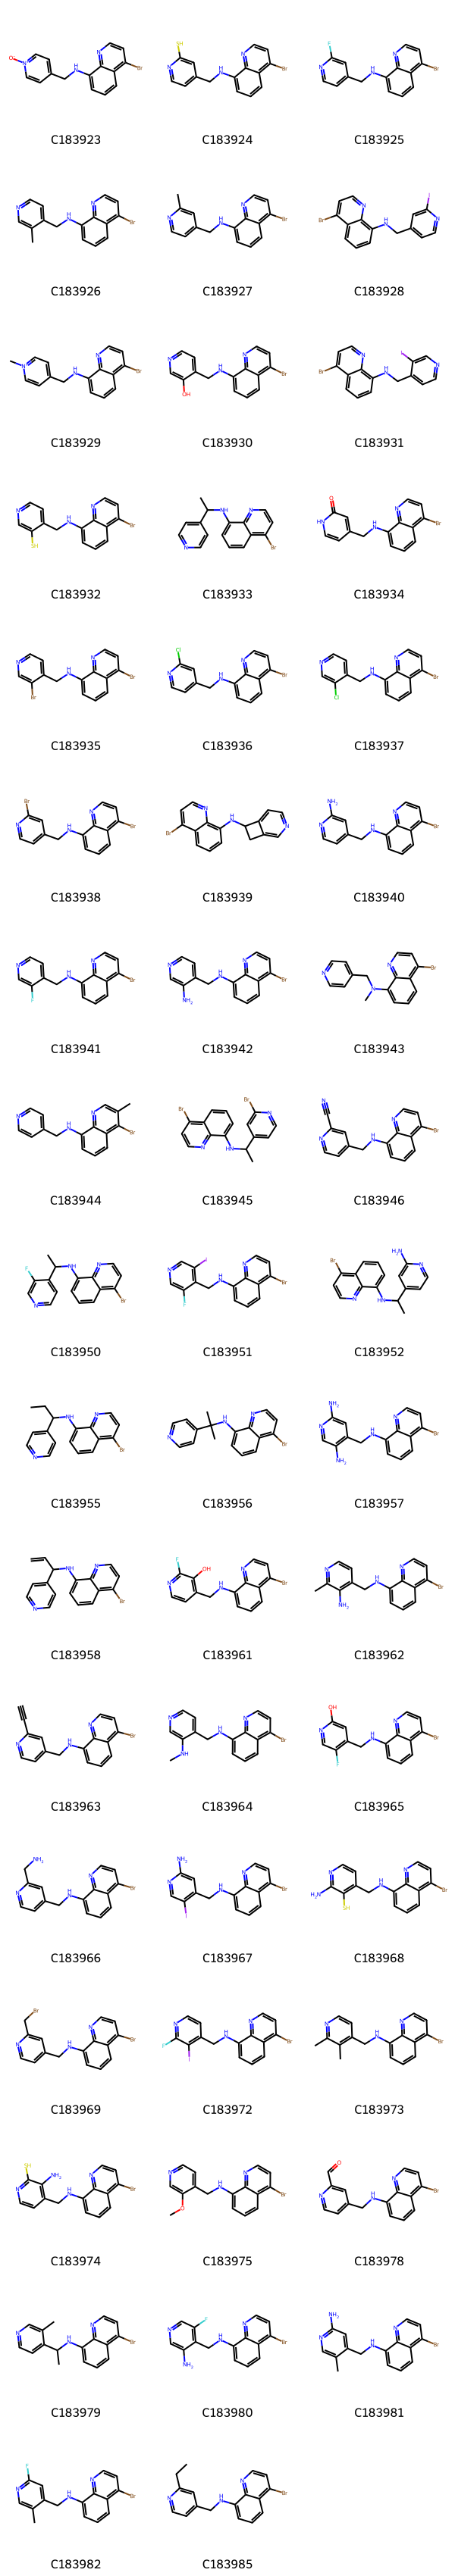

In [17]:
picks.draw()

In [18]:
recipes = hippo.Recipe.from_compounds(picks, quoted_only=False, pick_first=False, pick_cheapest=False)

#compounds = 114

Output()

 Success  Found solution for compound=C183923!

 Success  Found solution for compound=C183924!

 Success  Found solution for compound=C183925!

 Success  Found solution for compound=C183926!

 Success  Found solution for compound=C183927!

 Success  Found solution for compound=C183928!

 Success  Found solution for compound=C183929!

 Success  Found solution for compound=C183930!

 Success  Found solution for compound=C183931!

 Success  Found solution for compound=C183932!

 Success  Found solution for compound=C183933!

 Success  Found solution for compound=C183934!

 Success  Found solution for compound=C183935!

 Success  Found solution for compound=C183936!

 Success  Found solution for compound=C183937!

 Success  Found solution for compound=C183938!

 Success  Found solution for compound=C183939!

 Success  Found solution for compound=C183940!

 Success  Found solution for compound=C183941!

 Success  Found solution for compound=C183942!

 Success  Found solution for compound=C183943!

 Success  Found solution for compound=C183944!

 Success  Found solution for compound=C183945!

 Success  Found solution for compound=C183946!

 Success  Found solution for compound=C183950!

 Success  Found solution for compound=C183951!

 Success  Found solution for compound=C183952!

 Success  Found solution for compound=C183955!

 Success  Found solution for compound=C183956!

 Success  Found solution for compound=C183957!

 Success  Found solution for compound=C183958!

 Success  Found solution for compound=C183961!

 Success  Found solution for compound=C183962!

 Success  Found solution for compound=C183963!

 Success  Found solution for compound=C183964!

 Success  Found solution for compound=C183965!

 Success  Found solution for compound=C183966!

 Success  Found solution for compound=C183967!

 Success  Found solution for compound=C183968!

 Success  Found solution for compound=C183969!

 Success  Found solution for compound=C183972!

 Success  Found solution for compound=C183973!

 Success  Found solution for compound=C183974!

 Success  Found solution for compound=C183975!

 Success  Found solution for compound=C183978!

 Success  Found solution for compound=C183979!

 Success  Found solution for compound=C183980!

 Success  Found solution for compound=C183981!

 Success  Found solution for compound=C183982!

 Success  Found solution for compound=C183985!

 Success  Found solution for compound=C183986!

 Success  Found solution for compound=C183988!

 Success  Found solution for compound=C183991!

 Success  Found solution for compound=C183992!

 Success  Found solution for compound=C183993!

 Success  Found solution for compound=C183996!

 Success  Found solution for compound=C183997!

 Success  Found solution for compound=C183998!

 Success  Found solution for compound=C183999!

 Success  Found solution for compound=C184000!

 Success  Found solution for compound=C184002!

 Success  Found solution for compound=C184003!

 Success  Found solution for compound=C184005!

 Success  Found solution for compound=C184007!

 Success  Found solution for compound=C184008!

 Success  Found solution for compound=C184009!

 Success  Found solution for compound=C184010!

 Success  Found solution for compound=C184013!

 Success  Found solution for compound=C184014!

 Success  Found solution for compound=C184015!

 Success  Found solution for compound=C184016!

 Success  Found solution for compound=C184017!

 Success  Found solution for compound=C184020!

 Success  Found solution for compound=C184021!

 Success  Found solution for compound=C184022!

 Success  Found solution for compound=C184023!

 Success  Found solution for compound=C184026!

 Success  Found solution for compound=C184028!

 Success  Found solution for compound=C184034!

 Success  Found solution for compound=C184035!

 Success  Found solution for compound=C184036!

 Success  Found solution for compound=C184037!

 Success  Found solution for compound=C184038!

 Success  Found solution for compound=C184039!

 Success  Found solution for compound=C184040!

 Success  Found solution for compound=C184042!

 Success  Found solution for compound=C184043!

 Success  Found solution for compound=C184044!

 Success  Found solution for compound=C184046!

 Success  Found solution for compound=C184047!

 Success  Found solution for compound=C184050!

 Success  Found solution for compound=C184051!

 Success  Found solution for compound=C184052!

 Success  Found solution for compound=C184053!

 Success  Found solution for compound=C184054!

 Success  Found solution for compound=C184055!

 Success  Found solution for compound=C184056!

 Success  Found solution for compound=C184059!

 Success  Found solution for compound=C184060!

 Success  Found solution for compound=C184061!

 Success  Found solution for compound=C184062!

 Success  Found solution for compound=C184233!

 Success  Found solution for compound=C184238!

 Success  Found solution for compound=C184308!

 Success  Found solution for compound=C184309!

 Success  Found solution for compound=C184310!

 Success  Found solution for compound=C184311!

 Success  Found solution for compound=C184316!

 Success  Found solution for compound=C184317!

 Success  Found solution for compound=C185109!

 Success  Found solution for compound=C185138!

 Success  Found solution for compound=C185143!

 Success  Found solution for compound=C185147!

 Success  Found solution for compound=C185149!

Solving recipe combinations...

Output()

In [19]:
print(len(recipes))
recipe = recipes[0]
recipe

1

Recipe({Ingredient × 116} --> {Ingredient × 114} via {R × 114})

In [22]:
# recipe.write_json("RdRp_t3c_i2a_C29639.json")
recipe.write_json("RdRp_t3c_i2b_C56537.json")

 Warning  NULL Quote: 1.00mg of C183812!

 Warning  NULL Quote: 1.00mg of C183813!

 Warning  NULL Quote: 1.00mg of C183817!

 Warning  NULL Quote: 1.00mg of C183818!

 Warning  NULL Quote: 1.00mg of C183819!

 Warning  NULL Quote: 1.00mg of C183821!

 Warning  NULL Quote: 1.00mg of C183826!

 Warning  NULL Quote: 1.00mg of C183907!

 Warning  NULL Quote: 1.00mg of C183908!

 Warning  NULL Quote: 1.00mg of C183830!

 Warning  NULL Quote: 1.00mg of C183833!

 Warning  NULL Quote: 1.00mg of C183834!

 Warning  NULL Quote: 1.00mg of C183836!

 Warning  NULL Quote: 1.00mg of C183837!

 Warning  NULL Quote: 1.00mg of C183838!

 Warning  NULL Quote: 1.00mg of C183839!

 Warning  NULL Quote: 1.00mg of C183840!

 Warning  NULL Quote: 1.00mg of C183842!

 Warning  NULL Quote: 1.00mg of C183843!

 Warning  NULL Quote: 1.00mg of C183844!

 Warning  NULL Quote: 1.00mg of C183845!

 Warning  NULL Quote: 1.00mg of C183846!

 Warning  NULL Quote: 1.00mg of C183847!

 Warning  NULL Quote: 1.00mg of C183848!

 Warning  NULL Quote: 1.00mg of C183850!

 Warning  NULL Quote: 1.00mg of C183851!

 Warning  NULL Quote: 1.00mg of C183852!

 Warning  NULL Quote: 1.00mg of C183853!

 Warning  NULL Quote: 1.00mg of C183854!

 Warning  NULL Quote: 1.00mg of C183855!

 Warning  NULL Quote: 1.00mg of C183858!

 Warning  NULL Quote: 1.00mg of C183859!

 Warning  NULL Quote: 1.00mg of C183861!

 Warning  NULL Quote: 1.00mg of C183866!

 Warning  NULL Quote: 1.00mg of C183867!

 Warning  NULL Quote: 1.00mg of C183869!

 Warning  NULL Quote: 1.00mg of C183870!

 Warning  NULL Quote: 1.00mg of C183875!

 Warning  NULL Quote: 1.00mg of C183876!

 Warning  NULL Quote: 1.00mg of C183878!

 Warning  NULL Quote: 1.00mg of C183880!

 Warning  NULL Quote: 1.00mg of C183881!

 Warning  NULL Quote: 1.00mg of C183909!

 Warning  NULL Quote: 1.00mg of C183883!

 Warning  NULL Quote: 1.00mg of C183884!

 Warning  NULL Quote: 1.00mg of C183885!

 Warning  NULL Quote: 1.00mg of C183886!

 Warning  NULL Quote: 1.00mg of C183887!

 Warning  NULL Quote: 1.00mg of C183889!

 Warning  NULL Quote: 1.00mg of C183890!

 Warning  NULL Quote: 1.00mg of C183891!

 Warning  NULL Quote: 1.00mg of C183892!

 Warning  NULL Quote: 1.00mg of C183893!

 Warning  NULL Quote: 1.00mg of C183894!

 Warning  NULL Quote: 1.00mg of C183896!

 Warning  NULL Quote: 1.00mg of C183897!

 Warning  NULL Quote: 1.00mg of C183898!

 Warning  NULL Quote: 1.00mg of C183899!

 Warning  NULL Quote: 1.00mg of C183900!

 Warning  NULL Quote: 1.00mg of C183902!

 Warning  NULL Quote: 1.00mg of C183903!

 Warning  NULL Quote: 1.00mg of C183904!

 Warning  NULL Quote: 1.00mg of C183905!

 Warning  NULL Quote: 1.00mg of C183910!

 Warning  NULL Quote: 1.00mg of C183911!

 Warning  NULL Quote: 1.00mg of C183912!

 Warning  NULL Quote: 1.00mg of C183913!

 Warning  NULL Quote: 1.00mg of C183914!

 Warning  NULL Quote: 1.00mg of C183915!

 Warning  NULL Quote: 1.00mg of C183916!

 Warning  NULL Quote: 1.00mg of C183917!

 Warning  NULL Quote: 1.00mg of C183918!

 Warning  NULL Quote: 1.00mg of C183919!

 Warning  NULL Quote: 1.00mg of C183920!

 Warning  NULL Quote: 1.00mg of C183921!

 Warning  NULL Quote: 1.00mg of C183922!

 DISK  Writing RdRp_t3c_i2b_C56537.json...

In [24]:
df = recipe.reactants.df#[["compound_id", "amount"]]
df["smiles"] = df["compound_id"].apply(lambda x: animal.compounds[x].smiles)
df = df.set_index("compound_id")
# df[["smiles", "amount"]].to_csv("RdRp_t3c_i2a_C29639_reactants.csv")
df[["smiles", "amount"]].to_csv("RdRp_t3c_i2b_C56537_reactants.csv")

In [25]:
scaffold.reaction

 Warning  C56537 has multiple reactions, returning first!

R487: C70090 + C70091 -> C56537 via Mitsunobu_reaction_with_amine_alcohol_and_thioalcohol

In [3]:
animal.compounds(smiles="c1ccc(CNc2ccc3ccoc3c2)nc1")

C34650 "ASAP-0038667"

In [5]:
pset = animal.compounds(smiles="c1ccc(CNc2ccc3ccoc3c2)nc1").poses

In [8]:
insps = set()
for pose in pset:
    print(pose.inspirations.names)
    for inspiration in pose.inspirations.names:
        insps.add(inspiration)

['z0637a', '3vws-a']

['z0637a', '3vws-a']

['z0637a', '3vws-b']

['z0637a', '3vws-b']

['d0472b', '3vws-a']

['d0472b', '3vws-a']

['z0637a', '3vws-a']

['z0637a', '3vws-a']

['d0472b', '3vws-b']

['d0472b', '3vws-b']

In [9]:
insps

{'3vws-a', '3vws-b', 'd0472b', 'z0637a'}

In [3]:
RdRp_t3c_i2a_C29639 = hippo.Recipe.from_json(animal.db, "RdRp_t3c_i2a_C29639.json")

 DISK  Reading RdRp_t3c_i2a_C29639.json...

Recipe was generated at: 2025-04-11 08:55:13.639702

reactants = {Ingredient × 188}

intermediates = {Ingredient × 0}

products = {Ingredient × 186}

reactions = {R × 186}

In [4]:
RdRp_t3c_i2b_C56537 = hippo.Recipe.from_json(animal.db, "RdRp_t3c_i2b_C56537.json")

 DISK  Reading RdRp_t3c_i2b_C56537.json...

Recipe was generated at: 2025-04-11 09:46:47.621975

reactants = {Ingredient × 116}

intermediates = {Ingredient × 0}

products = {Ingredient × 114}

reactions = {R × 114}

In [6]:
RdRp_t3c_i2a_C29639.write_product_csv("RdRp_t3c_i2a_C29639_products.csv")

DEBUG: Querying database for routes

DEBUG: Assembling route dictionary

DEBUG: Checking availability

Output()

Output()

Output()

 ERROR  No upstream routes for 1.00mg of C77419!

 ERROR  No upstream routes for 1.00mg of C77424!

 ERROR  No upstream routes for 1.00mg of C77426!

 ERROR  No upstream routes for 1.00mg of C77432!

 ERROR  No upstream routes for 1.00mg of C77433!

 ERROR  No upstream routes for 1.00mg of C77436!

 ERROR  No upstream routes for 1.00mg of C77437!

 ERROR  No upstream routes for 1.00mg of C77439!

 ERROR  No upstream routes for 1.00mg of C77440!

 ERROR  No upstream routes for 1.00mg of C77441!

 ERROR  No upstream routes for 1.00mg of C77443!

 ERROR  No upstream routes for 1.00mg of C77448!

 ERROR  No upstream routes for 1.00mg of C77449!

 ERROR  No upstream routes for 1.00mg of C77450!

 ERROR  No upstream routes for 1.00mg of C77451!

 ERROR  No upstream routes for 1.00mg of C77469!

 ERROR  No upstream routes for 1.00mg of C77470!

 ERROR  No upstream routes for 1.00mg of C77471!

 ERROR  No upstream routes for 1.00mg of C77483!

 ERROR  No upstream routes for 1.00mg of C77484!

 ERROR  No upstream routes for 1.00mg of C77486!

 ERROR  No upstream routes for 1.00mg of C77488!

 ERROR  No upstream routes for 1.00mg of C77501!

 ERROR  No upstream routes for 1.00mg of C77504!

 ERROR  No upstream routes for 1.00mg of C77515!

 ERROR  No upstream routes for 1.00mg of C77518!

 ERROR  No upstream routes for 1.00mg of C77529!

 ERROR  No upstream routes for 1.00mg of C77530!

 ERROR  No upstream routes for 1.00mg of C77531!

 ERROR  No upstream routes for 1.00mg of C77532!

 ERROR  No upstream routes for 1.00mg of C77563!

 ERROR  No upstream routes for 1.00mg of C77591!

 ERROR  No upstream routes for 1.00mg of C77592!

 ERROR  No upstream routes for 1.00mg of C77602!

 ERROR  No upstream routes for 1.00mg of C77604!

 ERROR  No upstream routes for 1.00mg of C77605!

 ERROR  No upstream routes for 1.00mg of C77606!

 ERROR  No upstream routes for 1.00mg of C77618!

 ERROR  No upstream routes for 1.00mg of C77620!

 ERROR  No upstream routes for 1.00mg of C77621!

 ERROR  No upstream routes for 1.00mg of C77635!

 ERROR  No upstream routes for 1.00mg of C77644!

 ERROR  No upstream routes for 1.00mg of C77667!

 ERROR  No upstream routes for 1.00mg of C77668!

 ERROR  No upstream routes for 1.00mg of C77686!

 ERROR  No upstream routes for 1.00mg of C77691!

 ERROR  No upstream routes for 1.00mg of C77692!

 ERROR  No upstream routes for 1.00mg of C77694!

 ERROR  No upstream routes for 1.00mg of C77695!

 ERROR  No upstream routes for 1.00mg of C77696!

 ERROR  No upstream routes for 1.00mg of C77697!

 ERROR  No upstream routes for 1.00mg of C77698!

 ERROR  No upstream routes for 1.00mg of C77700!

 ERROR  No upstream routes for 1.00mg of C77701!

 ERROR  No upstream routes for 1.00mg of C78594!

 ERROR  No upstream routes for 1.00mg of C78595!

 ERROR  No upstream routes for 1.00mg of C78596!

 ERROR  No upstream routes for 1.00mg of C78597!

 ERROR  No upstream routes for 1.00mg of C78598!

 ERROR  No upstream routes for 1.00mg of C78599!

 ERROR  No upstream routes for 1.00mg of C78600!

 ERROR  No upstream routes for 1.00mg of C78601!

 ERROR  No upstream routes for 1.00mg of C78602!

 ERROR  No upstream routes for 1.00mg of C78603!

 ERROR  No upstream routes for 1.00mg of C79528!

 ERROR  No upstream routes for 1.00mg of C79529!

 ERROR  No upstream routes for 1.00mg of C79532!

 ERROR  No upstream routes for 1.00mg of C79541!

 ERROR  No upstream routes for 1.00mg of C79542!

 ERROR  No upstream routes for 1.00mg of C79556!

 ERROR  No upstream routes for 1.00mg of C79557!

 ERROR  No upstream routes for 1.00mg of C79558!

 ERROR  No upstream routes for 1.00mg of C79560!

 ERROR  No upstream routes for 1.00mg of C79580!

 ERROR  No upstream routes for 1.00mg of C79581!

 ERROR  No upstream routes for 1.00mg of C79582!

 ERROR  No upstream routes for 1.00mg of C79583!

 ERROR  No upstream routes for 1.00mg of C79584!

 ERROR  No upstream routes for 1.00mg of C79586!

 ERROR  No upstream routes for 1.00mg of C79587!

 ERROR  No upstream routes for 1.00mg of C79588!

 ERROR  No upstream routes for 1.00mg of C79589!

 ERROR  No upstream routes for 1.00mg of C79590!

 ERROR  No upstream routes for 1.00mg of C79591!

 ERROR  No upstream routes for 1.00mg of C79592!

 ERROR  No upstream routes for 1.00mg of C79593!

 ERROR  No upstream routes for 1.00mg of C79811!

 ERROR  No upstream routes for 1.00mg of C79826!

 ERROR  No upstream routes for 1.00mg of C79827!

 ERROR  No upstream routes for 1.00mg of C79828!

 ERROR  No upstream routes for 1.00mg of C79829!

 ERROR  No upstream routes for 1.00mg of C79830!

 ERROR  No upstream routes for 1.00mg of C79831!

 ERROR  No upstream routes for 1.00mg of C79832!

 ERROR  No upstream routes for 1.00mg of C79833!

 ERROR  No upstream routes for 1.00mg of C79834!

 ERROR  No upstream routes for 1.00mg of C79835!

 ERROR  No upstream routes for 1.00mg of C79836!

 ERROR  No upstream routes for 1.00mg of C79837!

 ERROR  No upstream routes for 1.00mg of C79839!

 ERROR  No upstream routes for 1.00mg of C79926!

 ERROR  No upstream routes for 1.00mg of C79927!

 ERROR  No upstream routes for 1.00mg of C79928!

 ERROR  No upstream routes for 1.00mg of C79929!

 ERROR  No upstream routes for 1.00mg of C79942!

 ERROR  No upstream routes for 1.00mg of C79946!

 ERROR  No upstream routes for 1.00mg of C79947!

 ERROR  No upstream routes for 1.00mg of C79949!

 ERROR  No upstream routes for 1.00mg of C79950!

 ERROR  No upstream routes for 1.00mg of C79951!

 ERROR  No upstream routes for 1.00mg of C79952!

 ERROR  No upstream routes for 1.00mg of C79953!

 ERROR  No upstream routes for 1.00mg of C79954!

 ERROR  No upstream routes for 1.00mg of C79955!

 ERROR  No upstream routes for 1.00mg of C79956!

 ERROR  No upstream routes for 1.00mg of C79957!

 ERROR  No upstream routes for 1.00mg of C79958!

 ERROR  No upstream routes for 1.00mg of C79959!

 ERROR  No upstream routes for 1.00mg of C79960!

 ERROR  No upstream routes for 1.00mg of C79961!

 ERROR  No upstream routes for 1.00mg of C79962!

 ERROR  No upstream routes for 1.00mg of C79963!

 DISK  Writing RdRp_t3c_i2a_C29639_products.csv...

In [13]:
RdRp_t3c_i2a_C29639.product_poses.write_sdf("RdRp_t3c_i2a_C29639_products_poses.sdf")

Output()

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-12-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-12-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-14-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-14-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-22-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-22-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-29-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-29-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-30-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-30-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-34-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-34-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-35-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-35-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-38-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-38-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-47-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-47-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-49-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-49-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-50-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-50-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-80-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-80-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-81-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-81-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-82-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-82-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-100-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-100-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-101-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-101-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-126-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-126-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-131-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-131-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-150-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-150-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-153-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-153-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-170-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-170-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-171-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-171-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-172-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-172-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-173-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-173-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-229-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-229-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-270-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-270-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-271-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-271-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-288-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-288-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-290-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-290-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-291-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-291-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-292-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-292-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-309-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-309-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-311-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-311-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-312-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-312-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-334-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-334-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-350-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-350-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-386-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-386-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-387-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-387-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-414-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-414-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-415-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-415-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-419-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-419-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-421-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-421-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-427-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-427-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-428-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-428-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-431-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-431-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-1919-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-1919-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-1922-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-1922-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-1923-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-1923-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-1927-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-1927-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-3071-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-3071-A.minimised.mol...

 DISK  Reading 
/opt/xchem-fragalysis-2/maxwin/RdRp_FFF/syndirella/mar_elabs/elabs_005/YAOSTISNIUSXMX-UHFFFAOYSA-N/output/YAOSTISNI
USXMX-UHFFFAOYSA-N-kzFKyu-3594-A/YAOSTISNIUSXMX-UHFFFAOYSA-N-kzFKyu-3594-A.minimised.mol...

 DISK  Writing RdRp_t3c_i2a_C29639_products_poses.sdf...

 C29639 "ASAP-0037733"

inchikey = YAOSTISNIUSXMX-UHFFFAOYSA-N

alias = ASAP-0037733

smiles = O=C(Nc1ccc(Cl)c2ncccc12)c1ccncc1

bases = None

elabs = elaborations of C29639: {C × 6601}

is_base = True

is_elab = False

num_heavy_atoms = 20

num_rings = 3

formula = C15H10ClN3O

#reactions (product) = 1

#reactions (reactant) = 0

tags = ['Fragmenstein placed', 'all enamine ordered', 'Knitwork pure merge', 'iter1 scaffolds', 'Green Site/RNA 
tunnel merge', 'elaborated iter1 scaffold', 'JA curated YES', 'acceptable']

#poses = 9

targets =
[T1 "Flavi_NS5_RdRp"]

metadata = {}

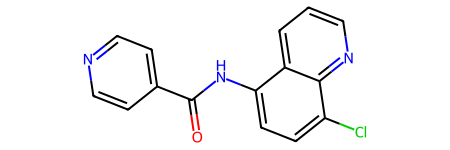

In [10]:
animal.C29639.summary()

In [11]:
animal.C29639.poses.interactive()

Output()

In [22]:
!git add *.sdf && git commit -m sdfs

In [15]:
RdRp_t3c_i1a_0FWIO6Z_quoted = hippo.Recipe.from_json(animal.db, "RdRp_t3c_i1a_0FWIO6Z_quoted.json")

 DISK  Reading RdRp_t3c_i1a_0FWIO6Z_quoted.json...

Recipe was generated at: 2025-03-17 21:12:12.022313

In [16]:
RdRp_t3c_i1a_0FWIO6Z_quoted

Recipe({Ingredient × 305} --> {Ingredient × 2} --> {Ingredient × 1228} via {R × 1230})

In [21]:
RdRp_t3c_i1a_0FWIO6Z_quoted_best_poses = RdRp_t3c_i1a_0FWIO6Z_quoted.products.best_placed_poses
RdRp_t3c_i1a_0FWIO6Z_quoted_best_poses.write_sdf("RdRp_t3c_i1a_0FWIO6Z_quoted_best_poses.sdf")

Output()

 DISK  Writing RdRp_t3c_i1a_0FWIO6Z_quoted_best_poses.sdf...

In [20]:
RdRp_t3c_i1a_0FWIO6Z_quoted_best_poses

{P × 720}

In [8]:
animal.compounds["ASAP-0037733"].elabs.poses

{P × 2006}

## Re-place onto scaffold

In [9]:
recipe = hippo.Recipe.from_json(animal.db,"RdRp_t3c_i2a_C29639.json")

 DISK  Reading RdRp_t3c_i2a_C29639.json...

Recipe was generated at: 2025-04-11 08:55:13.639702

reactants = {Ingredient × 188}

intermediates = {Ingredient × 0}

products = {Ingredient × 186}

reactions = {R × 186}

compounds = {Ingredient × 0}

In [22]:
animal.register_pose(
        compound=animal.compounds["ASAP-0037733"],
        target="Flavi_NS5_RdRp",
        path="../../BulkDock/TARGETS/Flavi_NS5_RdRp/aligned_files/d1351a/d1351a.pdb",
        # inchikey: str | None = None,
        alias="d1351a",
        # reference: int | None = None,
        tags=["hits"],
        # metadata: None | dict = None,
        # inspirations: None | list[int | Pose] = None,
        # return_pose: bool = True,
        # energy_score: float | None = None,
        # distance_score: float | None = None,
        # commit: bool = True,
        # overwrite_metadata: bool = True,
        # warn_duplicate: bool = True,
        # check_RMSD: bool = False,
        # RMSD_tolerance: float = 1.0,
        # split_PDB: bool = False,
        # duplicate_alias: str = "modify",
        # resolve_path: bool = True,
        load_mol=True,
)

 DISK  Reading /opt/xchem-fragalysis-2/maxwin/BulkDock/TARGETS/Flavi_NS5_RdRp/aligned_files/d1351a/d1351a.pdb...

C29639->P446140: "d1351a"

In [25]:
animal.poses["d1351a"].render()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [30]:
# tuples = set()
# for pose in mrich.track(recipe.product_compounds.poses):
#     print(pose)
#     things = [pose.smiles]
#     for inspiration in pose.inspirations:
#         things.append(inspiration.alias)
#     tuples.add(tuple(things))
# tuples

Output()

C77413->P237414: "DKXOGIRLTSGRJI-UHFFFAOYSA-N"

C77415->P237415: "UDKOUZLHYKSJFE-UHFFFAOYSA-N"

C77417->P237416: "FEGQPMPNQIBIFW-UHFFFAOYSA-N"

C77418->P237417: "WDSXJQJCRKVNRF-UHFFFAOYSA-N"

C77421->P237418: "FHJMQFKSNSGLBX-UHFFFAOYSA-N"

C77423->P237419: "SEDCSWGYZVKWFB-UHFFFAOYSA-N"

C77424->P237420: "ZFJNZKZJZWYCLD-UHFFFAOYSA-O"

C77425->P237421: "SFMIFWFCGANEIQ-UHFFFAOYSA-N"

C77426->P237422: "BNGXNMOAWVHVED-UHFFFAOYSA-N"

C77428->P237423: "XJDXJFMRGYLKLI-UHFFFAOYSA-N"

C77429->P237424: "FNMWNAKKFAQWDR-UHFFFAOYSA-N"

C77430->P237425: "ZFJULGNILCROJB-UHFFFAOYSA-N"

C77433->P237426: "CCMOBNDVSHOQDZ-UHFFFAOYSA-N"

C77434->P237427: "MJGSXYCHJYMWDI-UHFFFAOYSA-N"

C77436->P237428: "UGYLWSVMJQMVSZ-UHFFFAOYSA-N"

C77437->P237429: "JOOISOJEONDPAE-UHFFFAOYSA-N"

C77438->P237430: "PJXQTSBCVHJRKP-UHFFFAOYSA-N"

C77439->P237431: "LLLFWPJPPOVANX-UHFFFAOYSA-N"

C77440->P237432: "DDDOBXYHZMTNAM-UHFFFAOYSA-N"

C77441->P237433: "AVUUTDAGFHPXPJ-UHFFFAOYSA-N"

C77442->P237434: "CVJLDESCBYRUSZ-UHFFFAOYSA-N"

C77444->P237435: "ZEYRBNDBLVWNBP-UHFFFAOYSA-N"

C77445->P237436: "SCHDDTPOXGQVEZ-UHFFFAOYSA-N"

C77447->P237437: "XFZJRAQUFMYNIR-UHFFFAOYSA-N"

C77448->P237438: "LOLNESLSWHRDKX-UHFFFAOYSA-N"

C77449->P237439: "UUZOCBLDCXYIKZ-UHFFFAOYSA-N"

C77450->P237440: "MGBIILOHVWPYJI-UHFFFAOYSA-N"

C77459->P237446: "BYJNDXFLXZDNSG-UHFFFAOYSA-N"

C77469->P237453: "JEGLDYZXLQQMOJ-UHFFFAOYSA-N"

C77470->P237454: "OBWMRSVFLDIWLD-UHFFFAOYSA-N"

C77471->P237455: "WWSAPFFAYRWFBK-UHFFFAOYSA-N"

C77472->P237456: "OOTGRIVUZCDFPN-UHFFFAOYSA-N"

C77473->P237457: "AKDLQSUYGKFRMK-UHFFFAOYSA-N"

C77483->P237460: "YOEYSWPHRRIEHT-UHFFFAOYSA-N"

C77484->P237461: "LQHVJSJXINRHRP-UHFFFAOYSA-N"

C77489->P237463: "PNZPTWWVGQRGHR-UHFFFAOYSA-N"

C77490->P237464: "FTWJTVFTLAEIQX-UHFFFAOYSA-N"

C77494->P237468: "CIXSUHMNFGZJLO-UHFFFAOYSA-N"

C77501->P237474: "ZENHZUPMAKXYQZ-UHFFFAOYSA-N"

C77503->P237475: "RZCYRPLDFCEVMH-UHFFFAOYSA-N"

C77504->P237476: "PQHKIMBVMZFHKQ-UHFFFAOYSA-N"

C77514->P237485: "RRXUTBQGHFYNDX-UHFFFAOYSA-N"

C77515->P237486: "QCSKVHXPAHOEBT-UHFFFAOYSA-N"

C77516->P237487: "KOLRUNJXVRCYKB-UHFFFAOYSA-N"

C77517->P237488: "KGPFAAIGJFVIFJ-UHFFFAOYSA-N"

C77518->P237489: "NWEBENRSJCXRSW-UHFFFAOYSA-N"

C77529->P237497: "KXDYRLKTJSPDDX-UHFFFAOYSA-N"

C77530->P237498: "BOHWXLRPSZWTJX-UHFFFAOYSA-N"

C77531->P237499: "OJFDNWOEFHRCRZ-UHFFFAOYSA-N"

C77532->P237500: "KNLRPMGHUXZZKR-UHFFFAOYSA-N"

C77533->P237501: "ZILUFIILJKREFE-UHFFFAOYSA-N"

C77563->P237523: "HLQBGTAEOOMKPR-UHFFFAOYSA-N"

C77591->P237545: "WFTSNMOMCAYDKM-UHFFFAOYSA-N"

C77592->P237546: "LFOFXODKJREZPY-UHFFFAOYSA-N"

C77593->P237547: "HJQSZQCXVGWBTD-UHFFFAOYSA-N"

C77602->P237553: "NZLSHPHYPIMMAK-UHFFFAOYSA-N"

C77604->P237555: "GKAKHVRQLIFQNL-UHFFFAOYSA-N"

C77605->P237556: "XFKYKFOJPTVYNH-UHFFFAOYSA-N"

C77606->P237557: "IGNZZQMQVNOQJW-UHFFFAOYSA-N"

C77614->P237561: "JVNYZISUFTUEOU-UHFFFAOYSA-N"

C77615->P237562: "GVZALRPEDLHCSI-UHFFFAOYSA-N"

C77616->P237563: "RQUDDCYHJJWKDP-UHFFFAOYSA-N"

C77617->P237564: "PGTTYWWYDAXFTR-UHFFFAOYSA-N"

C77618->P237565: "DYUUCWYGEHXYDQ-UHFFFAOYSA-N"

C77619->P237566: "QTJOFTCXQRALNH-UHFFFAOYSA-N"

C77620->P237567: "JVTYFGDWFOLSLQ-UHFFFAOYSA-N"

C77621->P237568: "FWEJSTWNXJCMFM-UHFFFAOYSA-N"

C77632->P237577: "HVIQGCTXQLGIFI-UHFFFAOYSA-N"

C77633->P237578: "FAVLVDCRSWVQBT-UHFFFAOYSA-N"

C77634->P237579: "YOKVEJILSHDNKC-UHFFFAOYSA-N"

C77635->P237580: "XODRXRIEKJTFLQ-UHFFFAOYSA-N"

C77644->P237588: "DUVRUVXVGXUWRH-UHFFFAOYSA-N"

C77645->P237589: "JAGPFGLMOWIMFX-UHFFFAOYSA-N"

C77646->P237590: "VVLJIFXPPGUQGC-UHFFFAOYSA-N"

C77647->P237591: "CDIUHNWUYKXYAR-UHFFFAOYSA-N"

C77653->P237595: "PMDIBTYKVDBINH-UHFFFAOYSA-N"

C77654->P237596: "WPHIKZOGIIIICH-UHFFFAOYSA-N"

C77666->P237605: "GNBPZPUCQKBHRO-UHFFFAOYSA-N"

C77667->P237606: "WUQIYSAHFQYOLX-UHFFFAOYSA-N"

C77668->P237607: "NIVYILVUEHSGMS-UHFFFAOYSA-N"

C77669->P237608: "MBMSZSMSHWMEML-UHFFFAOYSA-N"

C77680->P237616: "NQCHAQREQFCPDU-UHFFFAOYSA-N"

C77681->P237617: "FLNXUFBJESOTRG-UHFFFAOYSA-N"

C77682->P237618: "QMBRIZARJWEQOY-UHFFFAOYSA-N"

C77684->P237620: "CWMJVCDCBNGSLM-UHFFFAOYSA-N"

C77686->P237622: "ZQQXUFUEAUFITQ-UHFFFAOYSA-N"

C77687->P237623: "IHISEKLRIPDDHE-UHFFFAOYSA-N"

C77688->P237624: "DAHJRFNGYBMDNI-UHFFFAOYSA-N"

C77689->P237625: "VSHMFQNFMAFKRX-UHFFFAOYSA-N"

C77690->P237626: "DERKLRNPOPOCKP-UHFFFAOYSA-N"

C77691->P237627: "LPUFCMLDBVEBNZ-UHFFFAOYSA-N"

C77692->P237628: "UDIADZJKGJIIFF-UHFFFAOYSA-N"

C77693->P237629: "UIKQWLQQVKVMGT-UHFFFAOYSA-N"

C77697->P237630: "CWFILHVZHLKHPZ-UHFFFAOYSA-N"

C77698->P237631: "MVWIMMIHWVGVMY-UHFFFAOYSA-N"

C77699->P237632: "CKCLSNGVOUJKIM-UHFFFAOYSA-N"

C77701->P237633: "VBLZIFNMNLCKAM-UHFFFAOYSA-N"

C78594->P238333: "BNEOMARKXMGGTG-UHFFFAOYSA-N"

C78597->P238334: "LSANSQJDMMMGPT-UHFFFAOYSA-N"

C78598->P238335: "PTSWVUFUDDKMCM-UHFFFAOYSA-N"

C78602->P238336: "UCFULLFKXBBHMY-UHFFFAOYSA-N"

C79556->P238933: "JZGKQSMZAFQPPH-UHFFFAOYSA-N"

C79959->P239055: "CBMRSUJVLKEMPC-UHFFFAOYSA-N"

{('CCn1c(=O)ccc2c(NC(=O)c3ccncc3)ccc(Cl)c21', 'z0221a', 'z1040a'),
 ('CNc1cc(C(=O)Nc2ccc(Cl)c3ncccc23)ccn1', 'z0221a', 'z1040a'),
 ('CNc1cnccc1C(=O)Nc1ccc(Cl)c2ncccc12', 'z0221a', 'z1040a'),
 ('COC(=O)c1cc(=O)c2c(NC(=O)c3ccncc3)ccc(Cl)c2[nH]1', 'z0221a', 'z1040a'),
 ('C[n+]1ccc(C(=O)Nc2ccc(Cl)c3ncccc23)cc1', 'z0221a', 'z1040a'),
 ('Cc1c(C(=O)Nc2ccc(Cl)c3ncccc23)ccnc1Cl', 'z0221a', 'z1040a'),
 ('Cc1cc(C(=O)Nc2ccc(Cl)c3ncccc23)cc(C)n1', 'z0221a', 'z1040a'),
 ('Cc1cc(C(=O)Nc2ccc(Cl)c3ncccc23)ccn1', 'z0221a', 'z1040a'),
 ('Cc1cc(C)c2c(NC(=O)c3ccncc3)c(Cl)cc(Cl)c2n1', 'z0221a', 'z1040a'),
 ('Cc1cc(C)c2c(NC(=O)c3ccncc3)ccc(Cl)c2n1', 'z0221a', 'z1040a'),
 ('Cc1cc(NC(=O)c2ccncc2)c2cccnc2c1Cl', 'z0221a', 'z1040a'),
 ('Cc1cc(O)c2c(NC(=O)c3ccncc3)ccc(Cl)c2n1', 'z0221a', 'z1040a'),
 ('Cc1ccc2c(NC(=O)c3ccncc3)ccc(Cl)c2n1', 'z0221a', 'z1040a'),
 ('Cc1ccnc2c(Cl)ccc(NC(=O)c3ccncc3)c12', 'z0221a', 'z1040a'),
 ('Cc1cncc(N)c1C(=O)Nc1ccc(Cl)c2ncccc12', 'z0221a', 'z1040a'),
 ('Cc1cnccc1C(=O)Nc1ccc(Cl)c2ncc

In [32]:
with open("RdRp_t3c_i2a_C29639_product_redock.csv", "wt") as f:
    f.write("smiles,hit1\n")
    for c in recipe.product_compounds:
        f.write(f"{c.smiles},d1351a\n")